# Lab-04

### Mrinal Bhan
#### *211020428, DSAI*

### Tasks
**Experiment Number -01**: Write a program to perform Text Detection and Recognition using OpenCV
and Tesseract (OCR).
**Description**: Use OpenCV and OCR (Optical Character Recognition) on your image to identify each
letter and convert them into text. It’s perfect for anyone looking to take information from an image or
video and turn it into text-based data. Many apps use OCR, like Google Lens, PDF Scanner, and more.
Ways to detect text from images:
- Use OpenCV
- Use Deep Learning models – the newest method,
- Use your custom model.

### Using Tesseract and OpenCV

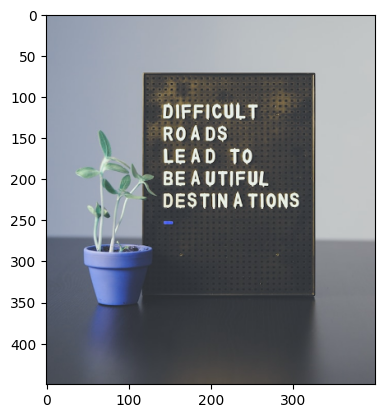

In [1]:
import cv2
from matplotlib import pyplot as plt
import pytesseract

img = cv2.imread("unsplash1.jpg")
img = cv2.resize(img, (400, 450))

plt.imshow(img)
plt.show()

In [2]:
text = pytesseract.image_to_string(img)
print(text)

re
ye) Ba ee
ROADS
LEAD TO

ea
SL Mut

 



### Using EasyOCR

In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

#### Read Images

In [2]:
IMAGE_PATH = 'unsplash1.jpg'

In [3]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)

#### Draw Results

In [4]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

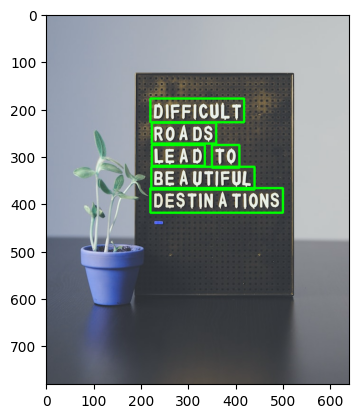

In [5]:
img = cv2.imread(IMAGE_PATH)
spacer = 50
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    # img = cv2.putText(img,text,(20,spacer), font, 1,(255,0,0),2,cv2.LINE_AA)
    spacer+=30
    
plt.imshow(img)
plt.show()

#### Text Recognition

In [6]:
for detection in result:
    text = detection[1]
    print(text)

difficult
Ro A dS
LE Ad
To
BE A UTifUL
DESTIN A tions


### Custom Model

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
# Model architecture
input_shape = (32, 128, 3)  # Image dimensions
num_classes = 27  # 26 letters + 1 for blank

model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 128, 32)       896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 64, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 32, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 32, 64)         36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 16, 64)        